In [1]:
import pickle
import sys

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

from src.utils import save_plt, scatter_random

PWD = '../..'
sys.path.append(PWD)

DATASET_PATH = '../../data/dataset/dataset.pkl'
DATASET_S45_PATH = '../../data/dataset/dataset_s45.pkl'
DATASET_R354331_PATH = '../../data/dataset/dataset_r354331.pkl'
DATASET_R354332_PATH = '../../data/dataset/dataset_r354332.pkl'
DATASET_R370138_PATH = '../../data/dataset/dataset_r370138.pkl'

IMAGES_DIR = PWD + '/data/images/dataset_visualisation/'

In [2]:
with open(DATASET_PATH, 'rb') as file:
    dataset = pickle.load(file)

with open(DATASET_S45_PATH, 'rb') as file:
    dataset_s45 = pickle.load(file)

with open(DATASET_R354331_PATH, 'rb') as file:
    dataset_r354331 = pickle.load(file)

with open(DATASET_R354332_PATH, 'rb') as file:
    dataset_r354332 = pickle.load(file)

with open(DATASET_R370138_PATH, 'rb') as file:
    dataset_r370138 = pickle.load(file)

In [3]:
def random_permutation(data, seed=42):
    if isinstance(data, list):
        data = np.array(data)

    np.random.seed(seed)
    idx = np.random.permutation(len(data))
    return data[idx]

# Sector 56

In [4]:
waveforms, labels = [], []

for p_ch, data in dataset.items():
    waveforms.extend(data[0])
    labels.extend([p_ch] * len(data[0]))

waveforms = np.array(waveforms)
labels = np.array([str(label) for label in labels])

In [5]:
SMALL_STEP = 3000

waveforms_small, labels_small = [], []

for p_ch, data in dataset.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend([p_ch] * len(data[0][:SMALL_STEP]))

waveforms_small = np.array(waveforms_small)
labels_small = np.array([str(label) for label in labels_small])

## PCA

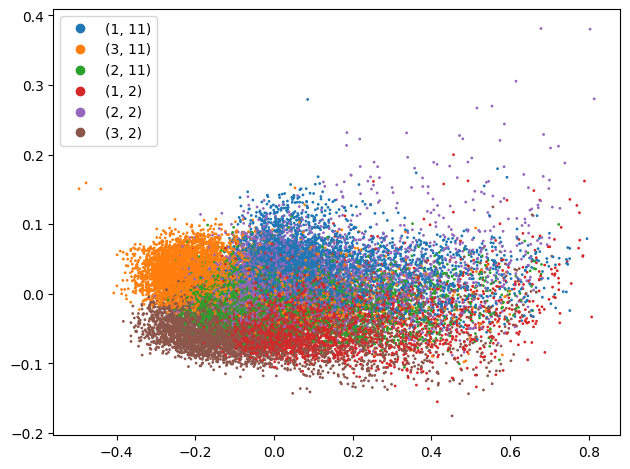

In [6]:
pca = PCA()
X_pca = pca.fit_transform(waveforms)

scatter_random(X_pca, labels, class_limit=5000)
save_plt(IMAGES_DIR + "s56_pca.pdf")
plt.show()

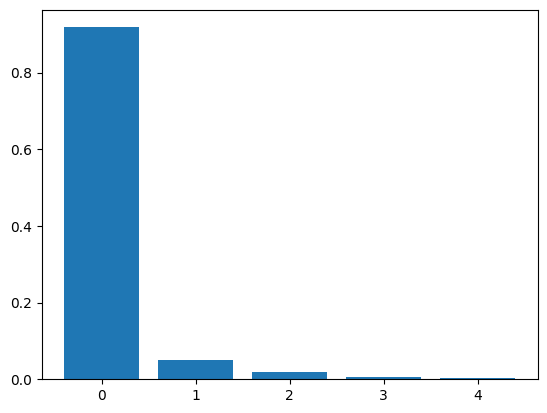

In [7]:
variance_ratio = pca.explained_variance_ratio_
plt.bar(np.arange(len(variance_ratio[:5])), variance_ratio[:5])

plt.show()

## t-SNE

In [8]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(waveforms_small)

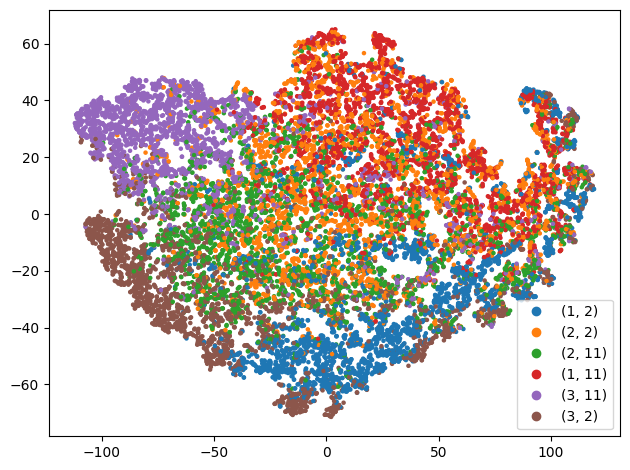

In [9]:
scatter_random(X_tsne, labels_small, size=5)
save_plt(IMAGES_DIR + "s56_tsne.pdf")
plt.show()

# Both sectors

In [41]:
waveforms, labels = [], []

for p_ch, data in dataset.items():
    waveforms.extend(data[0])
    labels.extend(["sector 56"] * len(data[0]))
for p_ch, data in dataset_s45.items():
    waveforms.extend(data[0])
    labels.extend(["sector 45"] * len(data[0]))

waveforms = np.array(waveforms)

In [42]:
SMALL_STEP = 1500

waveforms_small, labels_small = [], []

for p_ch, data in dataset.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["sector 56"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset_s45.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["sector 45"] * len(data[0][:SMALL_STEP]))

waveforms_small = np.array(waveforms_small)
labels_small = np.array([str(label) for label in labels_small])

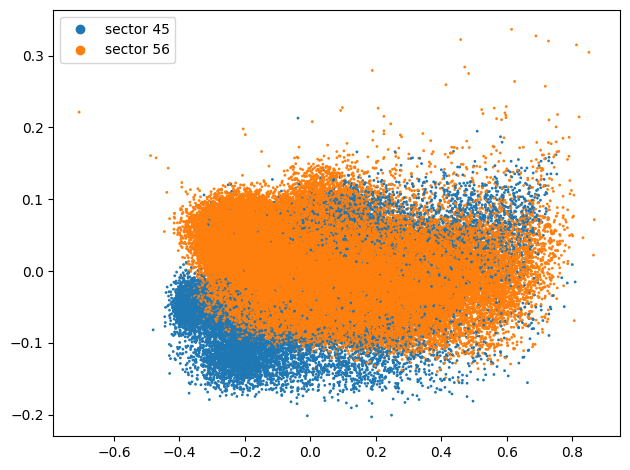

In [43]:
pca = PCA()
X_pca = pca.fit_transform(waveforms)

scatter_random(X_pca, labels, size=1)
save_plt(IMAGES_DIR + "both_sectors_pca.pdf")
plt.show()

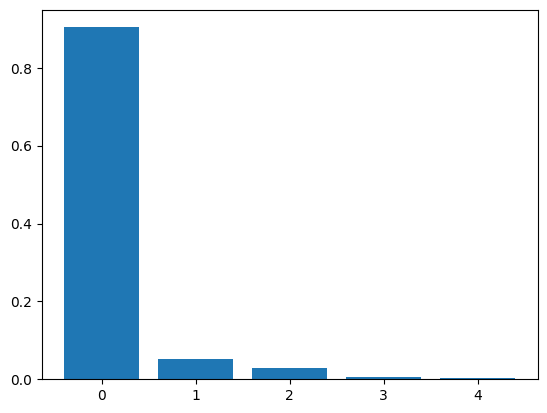

In [44]:
variance_ratio = pca.explained_variance_ratio_
plt.bar(np.arange(len(variance_ratio[:5])), variance_ratio[:5])

plt.show()

In [45]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(waveforms_small)

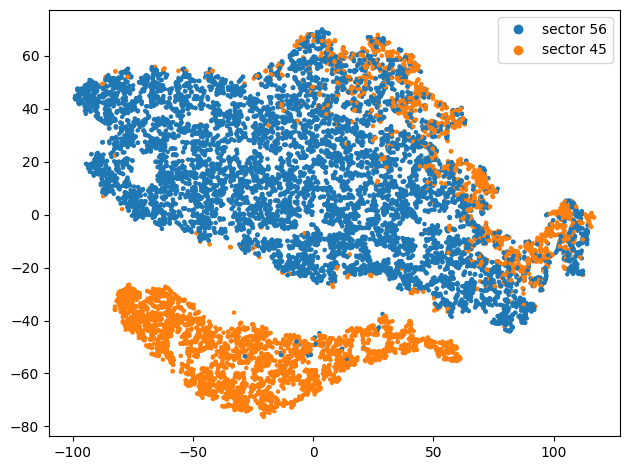

In [46]:
scatter_random(X_tsne, labels_small, size=5)
save_plt(IMAGES_DIR + "both_sectors_tsne.pdf")
plt.show()

# Many runs - 354331 vs 354332

In [16]:
waveforms, labels = [], []

for p_ch, data in dataset_r354331.items():
    waveforms.extend(data[0])
    labels.extend(["run 354331"] * len(data[0]))
for p_ch, data in dataset_r354332.items():
    waveforms.extend(data[0])
    labels.extend(["run 354332"] * len(data[0]))

In [17]:
SMALL_STEP = 1500

waveforms_small, labels_small = [], []

for p_ch, data in dataset_r354331.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 354331"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset_r354332.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 354332"] * len(data[0][:SMALL_STEP]))

waveforms_small = np.array(waveforms_small)
labels_small = np.array([str(label) for label in labels_small])

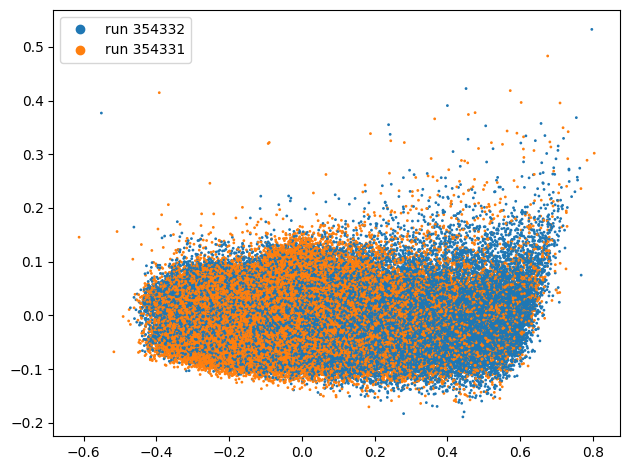

In [18]:
pca = PCA()
X_pca = pca.fit_transform(waveforms)

scatter_random(X_pca, labels, size=1)
save_plt(IMAGES_DIR + "r354331_r354332_pca.pdf")
plt.show()

In [19]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(waveforms_small)

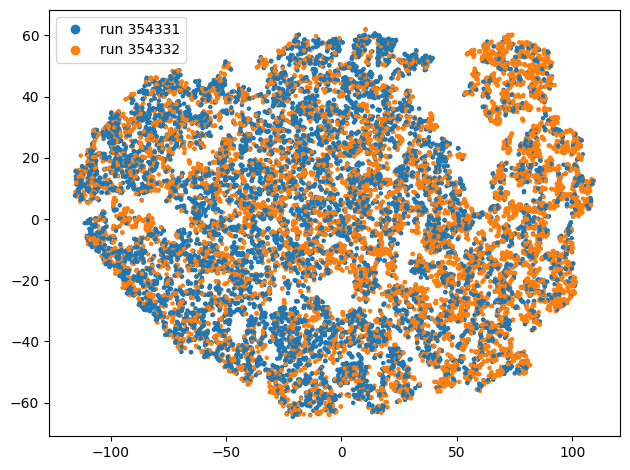

In [20]:
scatter_random(X_tsne, labels_small, size=5)
save_plt(IMAGES_DIR + "r354331_r354332_tsne.pdf")
plt.show()

# Many runs - 354332 vs 355207

In [21]:
waveforms, labels = [], []

for p_ch, data in dataset_r354332.items():
    waveforms.extend(data[0])
    labels.extend(["run 354332"] * len(data[0]))
for p_ch, data in dataset.items():
    waveforms.extend(data[0])
    labels.extend(["run 355207"] * len(data[0]))

In [22]:
SMALL_STEP = 1500

waveforms_small, labels_small = [], []

for p_ch, data in dataset_r354332.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 354332"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 355207"] * len(data[0][:SMALL_STEP]))

waveforms_small = np.array(waveforms_small)
labels_small = np.array([str(label) for label in labels_small])

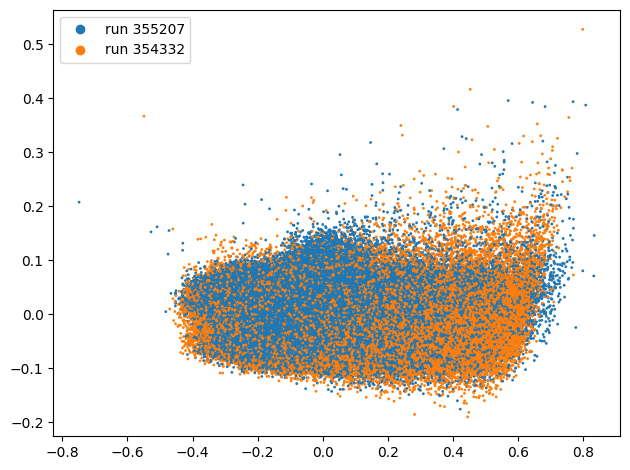

In [23]:
pca = PCA()
X_pca = pca.fit_transform(waveforms)

scatter_random(X_pca, labels, size=1)
save_plt(IMAGES_DIR + "r354332_r355207_pca.pdf")
plt.show()

In [24]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(waveforms_small)

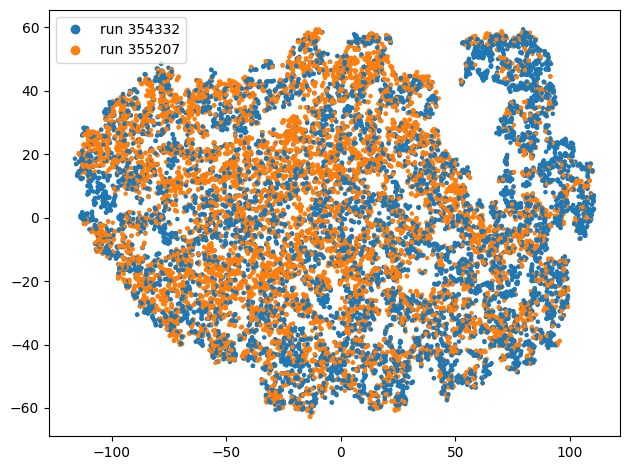

In [25]:
scatter_random(X_tsne, labels_small, size=5)
save_plt(IMAGES_DIR + "r354332_r355207_tsne.pdf")
plt.show()

# Many runs - 354331 vs 354332 vs 355207

In [36]:
waveforms, labels = [], []

for p_ch, data in dataset_r354331.items():
    waveforms.extend(data[0])
    labels.extend(["run 354331"] * len(data[0]))
for p_ch, data in dataset_r354332.items():
    waveforms.extend(data[0])
    labels.extend(["run 354332"] * len(data[0]))
for p_ch, data in dataset.items():
    waveforms.extend(data[0])
    labels.extend(["run 355207"] * len(data[0]))

labels = np.array([str(label) for label in labels])
np.unique(labels, return_counts=True)

(array(['run 354331', 'run 354332', 'run 355207'], dtype='<U10'),
 array([ 90957,  72354, 132543], dtype=int64))

In [37]:
SMALL_STEP = 1000

waveforms_small, labels_small = [], []

for p_ch, data in dataset_r354331.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 354331"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset_r354332.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 354332"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 355207"] * len(data[0][:SMALL_STEP]))

waveforms_small = np.array(waveforms_small)
labels_small = np.array([str(label) for label in labels_small])

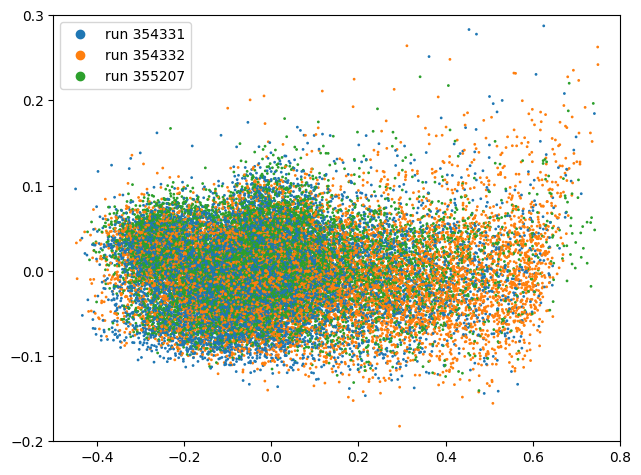

In [40]:
pca = PCA()
X_pca = pca.fit_transform(waveforms)

scatter_random(X_pca, labels, size=1, class_limit=10000, seed=44)
plt.xlim(-0.5, 0.8)
plt.ylim(-0.2, 0.3)
save_plt(IMAGES_DIR + "r354331_r354332_r355207_pca.pdf")
plt.show()

In [29]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(waveforms_small)

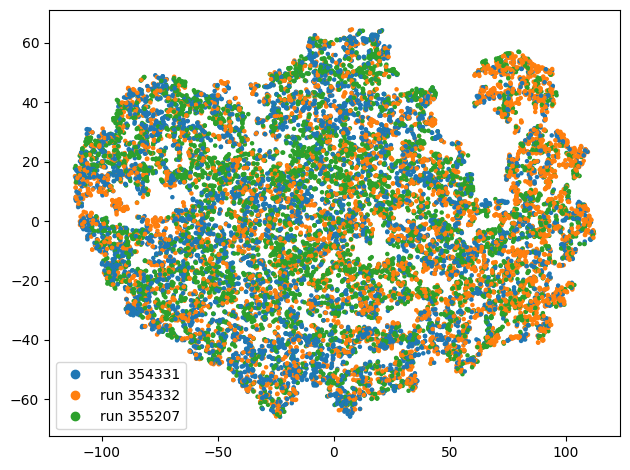

In [30]:
scatter_random(X_tsne, labels_small, size=5)
save_plt(IMAGES_DIR + "r354331_r354332_r355207_tsne.pdf")
plt.show()

In [31]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(waveforms_small)

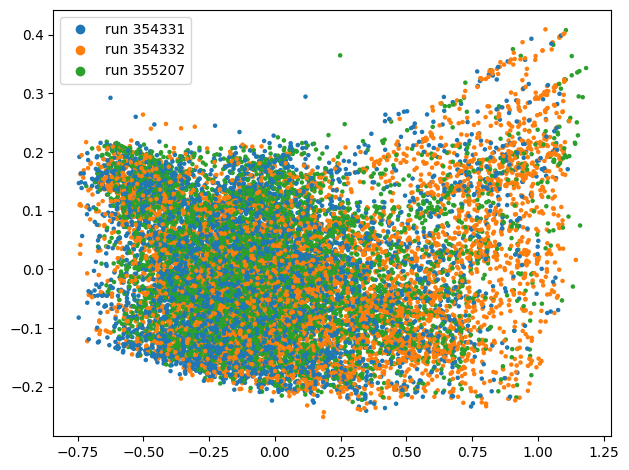

In [32]:
scatter_random(X_isomap, labels_small, size=5)
save_plt(IMAGES_DIR + "r354331_r354332_r355207_isomap.pdf")
plt.show()

# Many runs - 354332 vs 355207 vs 370138

In [33]:
SMALL_STEP = 1000

waveforms_small, labels_small = [], []

for p_ch, data in dataset_r354332.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 354332"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 355207"] * len(data[0][:SMALL_STEP]))
for p_ch, data in dataset_r370138.items():
    waveforms_small.extend(random_permutation(data[0])[:SMALL_STEP])
    labels_small.extend(["run 370138"] * len(data[0][:SMALL_STEP]))

waveforms_small = np.array(waveforms_small)
labels_small = np.array([str(label) for label in labels_small])

In [34]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(waveforms_small)

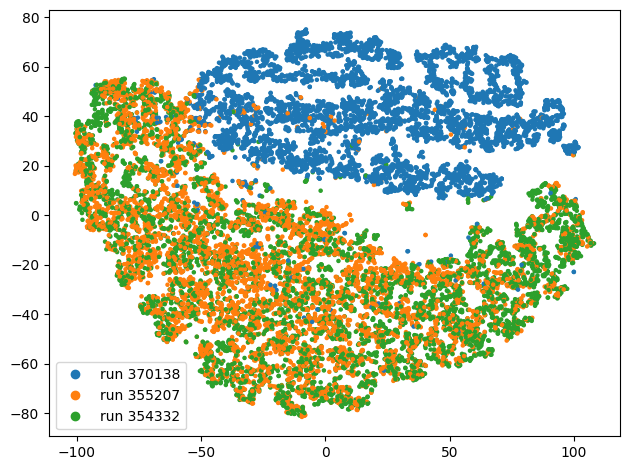

In [35]:
scatter_random(X_tsne, labels_small, size=5)
save_plt(IMAGES_DIR + "r354332_r355207_r370138_tsne.pdf")
plt.show()